# Lead Score - Case Study

### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [793]:
## Let's import important libraries first

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [794]:
## Let's import the file and check the data and it's shape, info, data types etc.

pd_leads = pd.read_csv("C:\\Users\\kruna\\Downloads\\Lead_Scoring_Assignment\\Leads.csv")

In [795]:
pd_leads.shape

(9240, 37)

In [796]:
# Let's check the data for sanity analysis
pd_leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [797]:
# Check the information of all the attributes with data type
pd_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [798]:
# Let's Check the behaviour of all the numeric variables 
pd_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### From the above info it looks like there are lots of descripancy in the data which can affect our model performance. So it is highly required to perform Data Cleaning.


# Step 1 - Data Cleaning

In [799]:
# As written in the problem statement, "Select" is as like as the null values or no values.
# Let's impute all the values mentioned as "Select" with NaN using np.NaN

pd_leads = pd_leads.replace('Select', np.nan)

In [800]:
# Let's check the number of null values in all the attributes
pd_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [801]:
# Very huge number of null values in lots of columns. Bad Data :( Phewww!!!

# Let's check the percentage of null values

round(100*(pd_leads.isnull().mean()),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [802]:
# Now let's drop attributees having > 40% null values - Here 40% is assumed threshold by seeing the data

cols = pd_leads.columns
print(cols)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [803]:
for i in cols:
    if((100*(pd_leads[i].isnull().mean())) >= 40):
        pd_leads.drop(i, axis = 1, inplace = True)

In [804]:
round(100*(pd_leads.isnull().mean()),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [805]:
# Further to that we are planning to create a model before the sales team's response to reduce the work of sales team 
# and convert more leads in less time

# Let's drop the columns which are added by or to be added by sales team

sales_columns = ['Last Activity','Last Notable Activity','Tags']
print(sales_columns)

['Last Activity', 'Last Notable Activity', 'Tags']


In [806]:
for j in sales_columns:
        pd_leads.drop(j, axis = 1, inplace = True)

In [807]:
round(100*(pd_leads.isnull().mean()),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [808]:
#Check for all the rows having more than 70% missing values

pd_leads[100*pd_leads.isnull().sum(axis=1)/pd_leads.shape[1] > 70]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview


In [809]:
# No rows are there to drop which are having more than 70% missing values
pd_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,NaN,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,NaN,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No


In [810]:
## Now let's find unique values in all the columns and drop the columns which are having high number of unique values

In [811]:
pd_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [812]:
# Here ProspectID and Lead number have the same number of unique values as the shape
# So it can be identified as unique identifier and can be dropped because it won't help us in analysis

unq_cols = ['Prospect ID','Lead Number']
print(unq_cols)

['Prospect ID', 'Lead Number']


In [813]:
for k in unq_cols:
        pd_leads.drop(k, axis = 1, inplace = True)

In [814]:
round(100*(pd_leads.isnull().mean()),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [815]:
pd_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

### Let's do Categorical Attributes Analysis

In [816]:
#Let's check the value counts of Country 

pd_leads['Country'].value_counts(dropna=False)/len(pd_leads)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [817]:
# Categorical column - Let's check the mode value for the same
mode_country = pd_leads.Country.mode()
mode_country

0    India
Name: Country, dtype: object

In [818]:
# Here 70% values are related to india and 26% are related to Null
# Let's convert the null values with the Mode value

pd_leads['Country'] = pd_leads['Country'].replace(np.nan,'India')

In [819]:
pd_leads['Country'].value_counts(dropna=False)/len(pd_leads)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [820]:
# Here big amount of data from country India, which can't be used to create logistic regression
# So the same can be dropped because it is not useful in creating inferences

pd_leads.drop(['Country'], axis = 1, inplace = True)

In [821]:
round(100*(pd_leads.isnull().mean()),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [822]:
pd_leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
Receive More Updates About O

In [823]:
pd_leads.shape

(9240, 24)

In [824]:
print((pd_leads.nunique() == 1))

Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Specialization                                   False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                          True
Newspaper Article                                False
X Education Forums                               False
Newspaper                                        False
Digital Advertisement                            False
Through Recommendations                          False
Receive Mo

In [825]:
print(pd_leads.Magazine.value_counts(dropna=False))
print('-------------------------------')
print(pd_leads['Receive More Updates About Our Courses'].value_counts(dropna=False))
print('-------------------------------')
print(pd_leads['Update me on Supply Chain Content'].value_counts(dropna=False))
print('-------------------------------')
print(pd_leads['Get updates on DM Content'].value_counts(dropna=False))
print('-------------------------------')
print(pd_leads['I agree to pay the amount through cheque'].value_counts(dropna=False))

No    9240
Name: Magazine, dtype: int64
-------------------------------
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
-------------------------------
No    9240
Name: Update me on Supply Chain Content, dtype: int64
-------------------------------
No    9240
Name: Get updates on DM Content, dtype: int64
-------------------------------
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [826]:
# Above all the columns have 100% single unique values so they can't be used for analysis and model creation.
# So, let's drop all of them because they are imbalance variables in  model creation

In [827]:
pd_leads.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [828]:
pd_leads.shape

(9240, 20)

In [829]:
#checking value counts of "City" attribute

pd_leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [830]:
pd_leads['City'] = pd_leads['City'].replace(np.nan,'Mumbai')

In [831]:
pd_leads['City'].value_counts()/100

Mumbai                         68.91
Thane & Outskirts               7.52
Other Cities                    6.86
Other Cities of Maharashtra     4.57
Other Metro Cities              3.80
Tier II Cities                  0.74
Name: City, dtype: float64

In [832]:
pd_leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### City column do not have unique values more than 70%, so can't be dropped

In [833]:
round(100*(pd_leads.isnull().mean()),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
City      

In [834]:
#checking value counts of "Specialization" attribute

pd_leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [835]:
#checking value counts of "What is your current occupation" attribute

pd_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [836]:
pd_leads['What is your current occupation'].value_counts()/100

Unemployed              56.00
Working Professional     7.06
Student                  2.10
Other                    0.16
Housewife                0.10
Businessman              0.08
Name: What is your current occupation, dtype: float64

In [837]:
#checking value counts of "What matters most to you in choosing a course" attribute

pd_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [838]:
pd_leads['What matters most to you in choosing a course'].value_counts()/100

Better Career Prospects      65.28
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

## So above columns do not have the null values above the threshold so we can drop them.

#### So, let's impute some values in place of nulls.

In [839]:
pd_leads['Specialization'] = pd_leads['Specialization'].fillna('Not Filled') 
pd_leads['What matters most to you in choosing a course'] = pd_leads['What matters most to you in choosing a course'].fillna('Not Filled')
pd_leads['What is your current occupation'] = pd_leads['What is your current occupation'].fillna('Not Filled')

In [840]:
# Let's check the percentage of null values

round(100*(pd_leads.isnull().mean()),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
City                        

In [841]:
# Checking the percent of lose if the null values are removed
round(100*(sum(pd_leads.isnull().sum(axis=1) > 1)/pd_leads.shape[0]),2)

1.48

In [842]:
pd_leads_new = pd_leads[pd_leads.isnull().sum(axis=1) <1]

In [843]:
# Code for checking number of rows left in percent
round(100*(pd_leads_new.shape[0])/(pd_leads.shape[0]),2)

98.2

In [844]:
# Rechecking the percentage of missing values
round(100*(pd_leads_new.isnull().sum()/len(pd_leads_new.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
City                                          

In [845]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Not Filled,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Mumbai,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Not Filled,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Not Filled,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Mumbai,No


In [846]:
pd_leads_new.shape

(9074, 20)

In [847]:
pd_leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

In [848]:
# To check all the categorical values
for column in pd_leads_new:
    print('------------- '+column+' ---------------------')
    print(pd_leads_new[column].astype('category').value_counts())
    print('----------------------------------------------------')

------------- Lead Origin ---------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------
------------- Lead Source ---------------------
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------
------------- Do Not Email ---------------------
No     8358

### Again there is a data imbalance found for columns

1. Do Not Call
2. Search
3. Magazine
4. Newspaper Article
5. X Education Forums
6. Newspaper
7. Digital Advertisement
8. Through Recommendations

### So, Lets drop all of them

In [849]:
pd_leads_new.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis = 1, inplace = True)

In [850]:
pd_leads_new.shape

(9074, 12)

In [851]:
# Rechecking the percentage of missing values
round(100*(pd_leads_new.isnull().sum()/len(pd_leads_new.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
dtype: float64

## Seems like now our data is cleaned.
Let's perform some EDA.

# Step 2 - EDA

In [852]:
pd_leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [853]:
## Let's perform Univariate analysis for all the categorical attributes

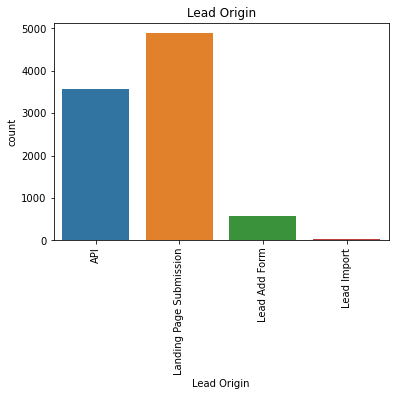

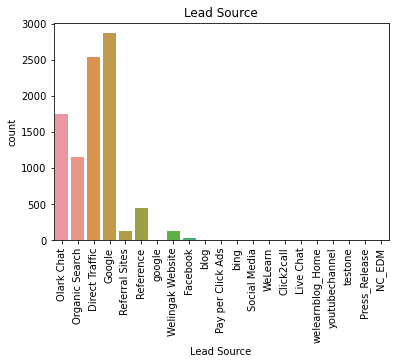

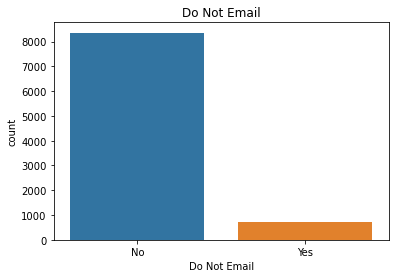

In [854]:
#plt.figure(figsize = (20,40))

#plt.subplot(4,2,1)
sns.countplot(pd_leads_new['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

#plt.subplot(4,2,2)
sns.countplot(pd_leads_new['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#plt.subplot(4,2,3)
sns.countplot(pd_leads_new['Do Not Email'])
plt.title('Do Not Email')
plt.show()


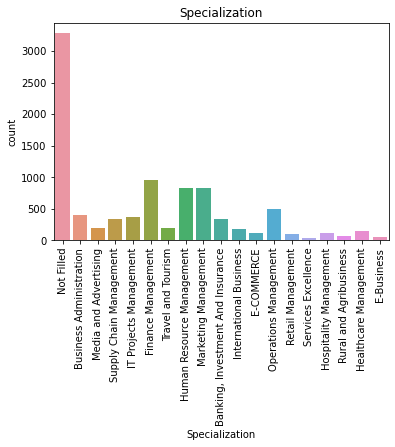

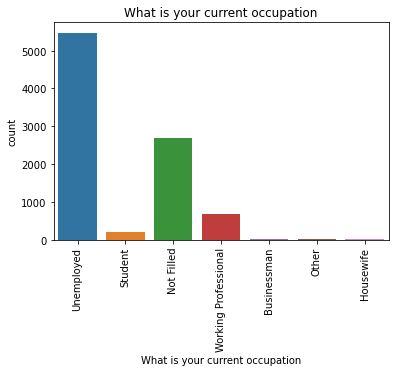

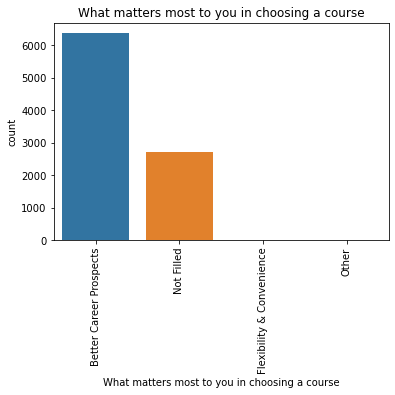

In [855]:
#plt.subplot(4,2,4)
sns.countplot(pd_leads_new['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

#plt.subplot(4,2,5)
sns.countplot(pd_leads_new['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

#plt.subplot(4,2,6)
sns.countplot(pd_leads_new['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

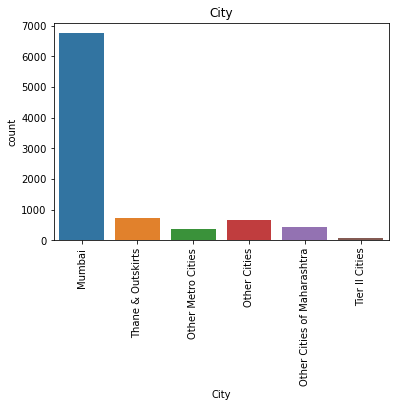

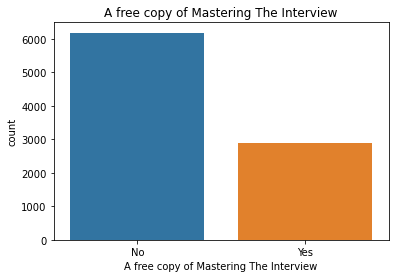

In [856]:
#plt.subplot(4,2,7)
sns.countplot(pd_leads_new['City']).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

#plt.subplot(4,2,8)
sns.countplot(pd_leads_new['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.show()

In [857]:
## Now, let's check for the numeric variables

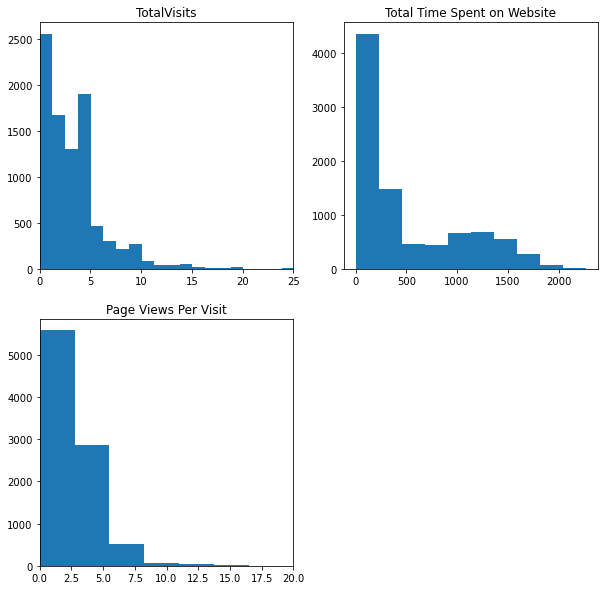

In [858]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(pd_leads_new['TotalVisits'], bins = 200)
plt.title('TotalVisits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(pd_leads_new['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(pd_leads_new['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Let's perform analysis for all categories with conversion rate

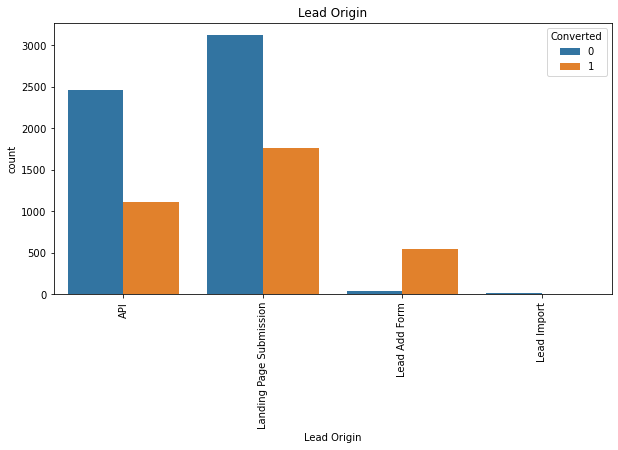

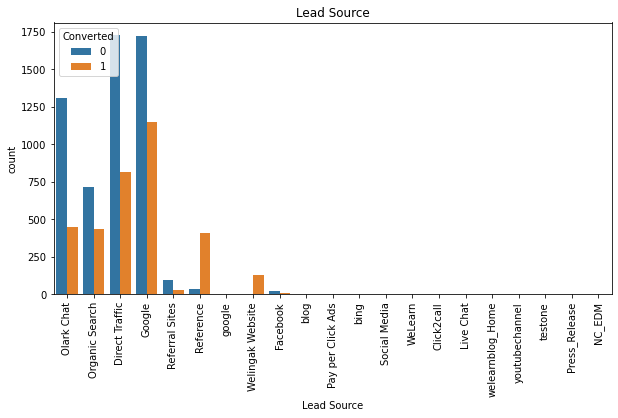

In [859]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Origin', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x='Lead Source', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

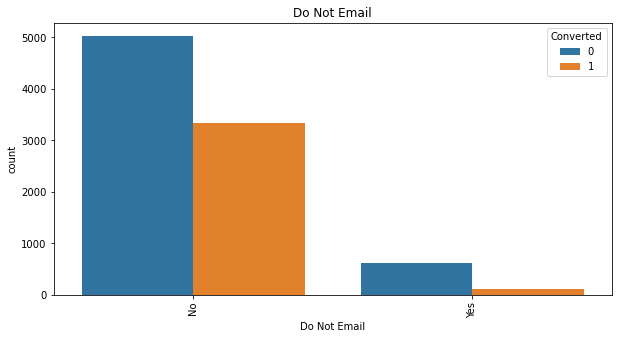

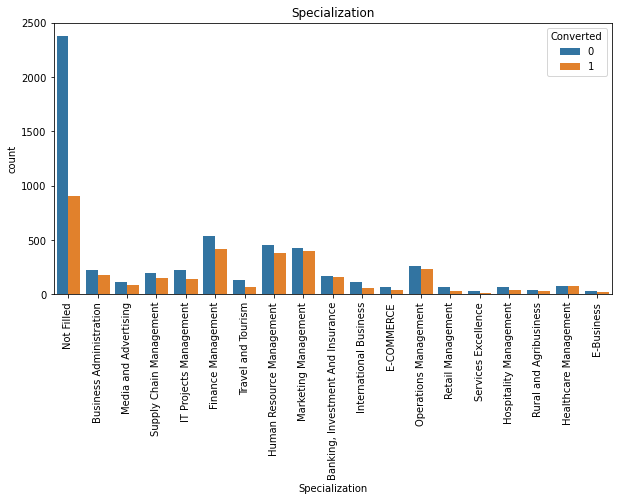

In [860]:
plt.figure(figsize = (10,5))
sns.countplot(x='Do Not Email', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x='Specialization', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

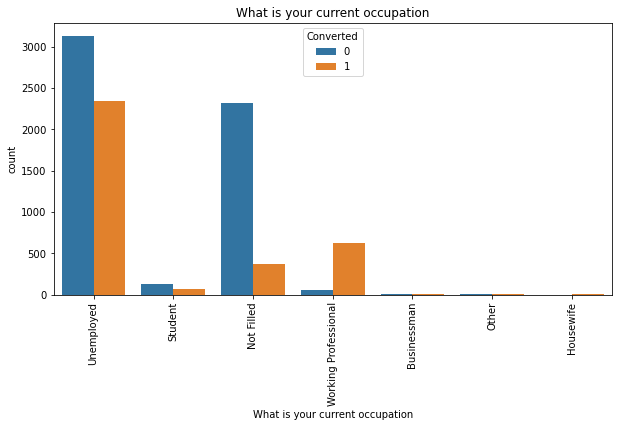

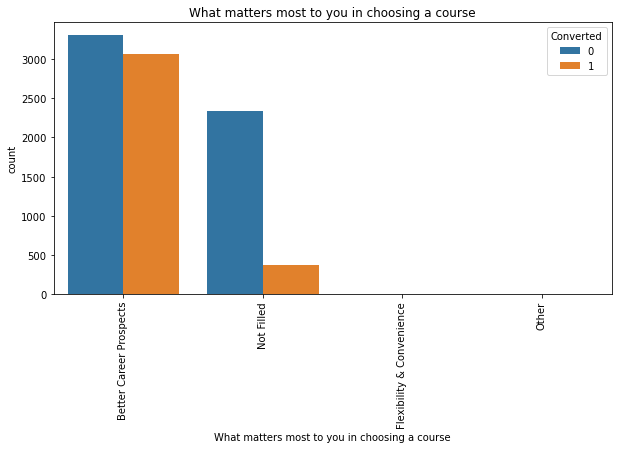

In [861]:
plt.figure(figsize = (10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

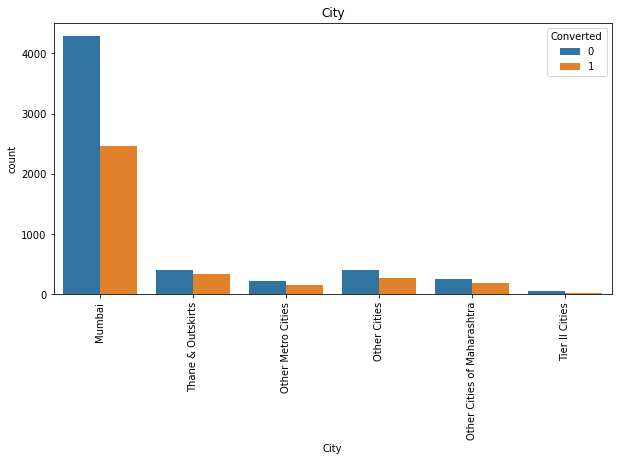

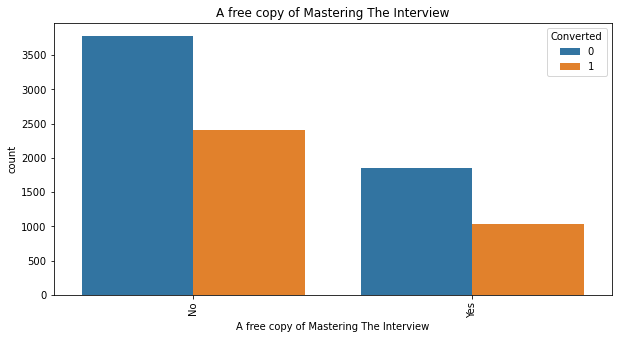

In [862]:
plt.figure(figsize = (10,5))
sns.countplot(x='City', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

In [863]:
#Let's club all the Management Specializations because they looks like similar

pd_leads_new['Specialization'] = pd_leads_new['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

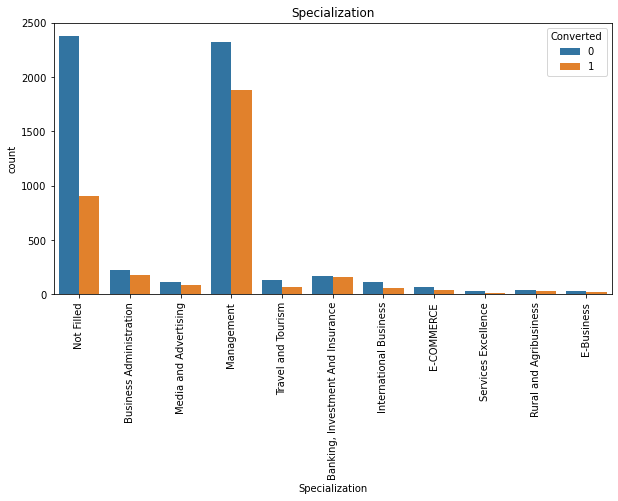

In [864]:
plt.figure(figsize = (10,5))
sns.countplot(x='Specialization', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

In [865]:
pd_leads_new['What is your current occupation'].value_counts()

Unemployed              5476
Not Filled              2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [866]:
#Let's impute something on What is your current occupation

pd_leads_new['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
Not Filled              2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [867]:
#imputing Not Filled values with mode "Unemployed"

pd_leads_new['What is your current occupation'] = pd_leads_new['What is your current occupation'].replace('Not Filled', 'Unemployed')

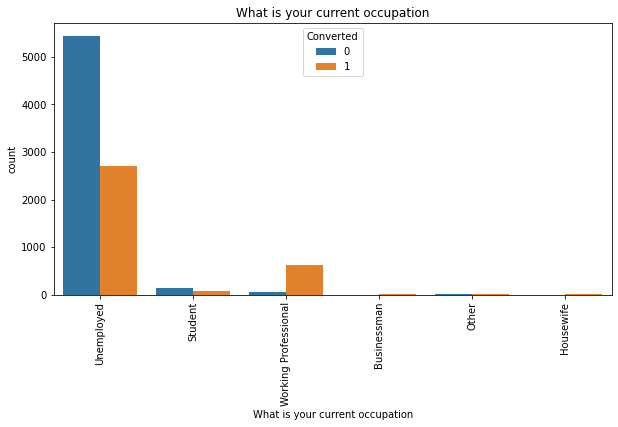

In [868]:
plt.figure(figsize = (10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

In [869]:
#checking count of values
pd_leads_new['What is your current occupation'].value_counts(dropna=False)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [870]:
#Let's do some analysis for What matters most to you in choosing a course

pd_leads_new['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6370
Not Filled                   2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [871]:
#replacing Not Filled values with Mode "Better Career Prospects"

pd_leads_new['What matters most to you in choosing a course'] = pd_leads_new['What matters most to you in choosing a course'].replace('Not Filled','Better Career Prospects')

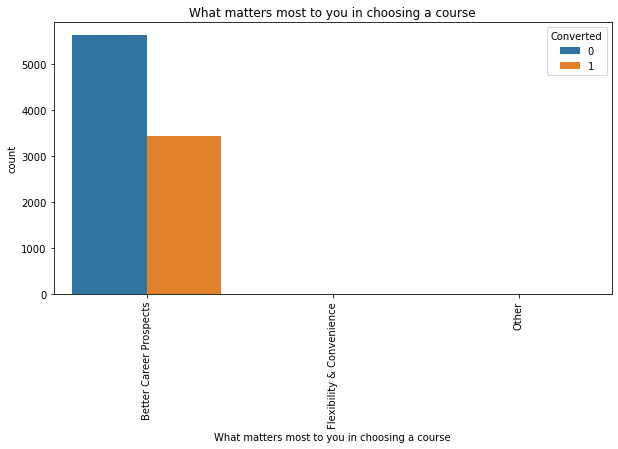

In [872]:
plt.figure(figsize = (10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

In [873]:
#checking value counts of for "What matters most to you in choosing a course"
pd_leads_new['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [874]:
#This column again can be dropped due to high imbalance values

pd_leads_new.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [875]:
pd_leads_new.shape

(9074, 11)

In [876]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Not Filled,Unemployed,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,Not Filled,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Filled,Unemployed,Mumbai,No


In [877]:
#Let's check and do some analysis of Lead Source column

pd_leads_new['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [878]:
#Impute Same category low frequency values to others

pd_leads_new['Lead Source'] = pd_leads_new['Lead Source'].replace('google','Google')
pd_leads_new['Lead Source'] = pd_leads_new['Lead Source'].replace('Facebook','Social Media')
pd_leads_new['Lead Source'] = pd_leads_new['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

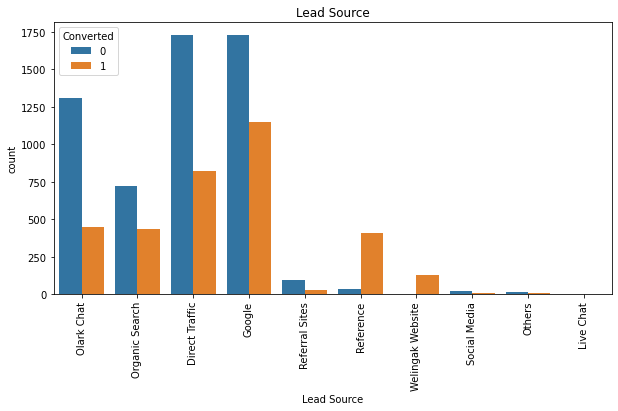

In [879]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Source', hue='Converted', data= pd_leads_new).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [880]:
#Checking percentage of Null Values in All Columns:
round(100*(pd_leads_new.isnull().sum()/len(pd_leads_new.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

## Let's perform Numerical Attributes Analysis

In [881]:
Converted = (sum(pd_leads_new['Converted'])/len(pd_leads_new['Converted'].index))*100
Converted

37.85541106458012

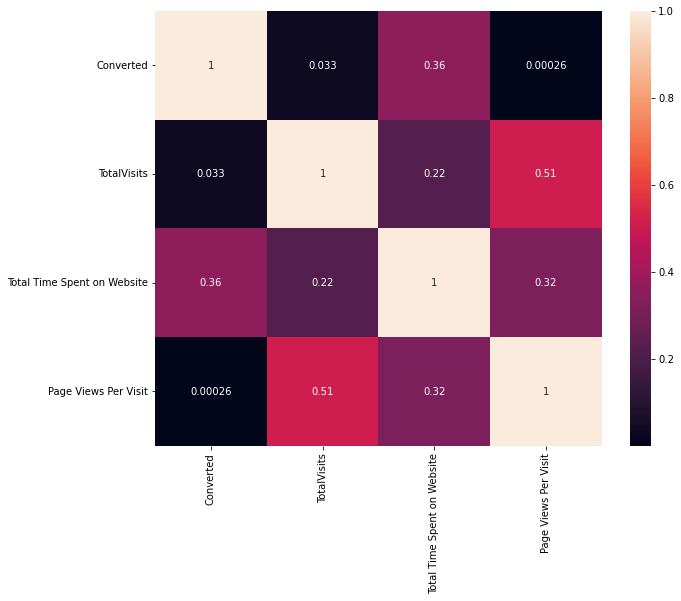

In [882]:
#Checking correlations of all the numeric values
# figure size
plt.figure(figsize=(10,8))

# Correlation map - Heat Map
sns.heatmap(pd_leads_new.corr(), annot=True)
plt.show()

## No high correlation found between any numeric variables, so no variables to be dropped due to high correlation.

# Let's perform outlier treatment

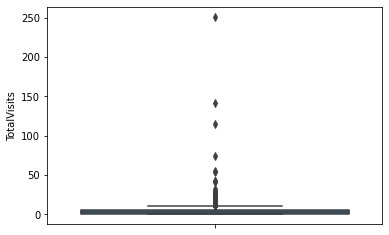

In [883]:
#Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y=pd_leads_new['TotalVisits'])
plt.show()

In [884]:
## There is a visible ouliers

#checking percentile values for "Total Visits"

pd_leads_new['TotalVisits'].describe(percentiles=[0.01, 0.02, 0.05,.25, .5, .75, .90, .95, 0.98, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
1%          0.000000
2%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

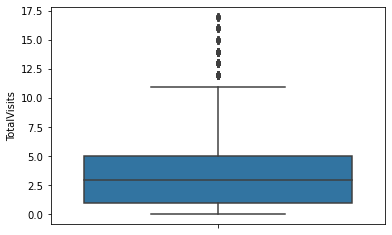

In [885]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = pd_leads_new.TotalVisits.quantile(0.99)
pd_leads_new = pd_leads_new[(pd_leads_new.TotalVisits <= Q3)]
Q1 = pd_leads_new.TotalVisits.quantile(0.01)
pd_leads_new = pd_leads_new[(pd_leads_new.TotalVisits >= Q1)]
sns.boxplot(y=pd_leads_new['TotalVisits'])
plt.show()

In [886]:
#Let's check the percentiles for "Total Time Spent on Website"

pd_leads_new['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

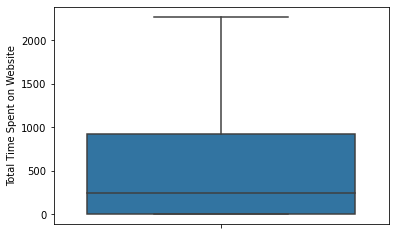

In [887]:
#Visualize the Total Time Spent on Website variable

plt.figure(figsize=(6,4))
sns.boxplot(y=pd_leads_new['Total Time Spent on Website'])
plt.show()

In [888]:
#Let's check the "Page Views Per Visit" attribute

pd_leads_new['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

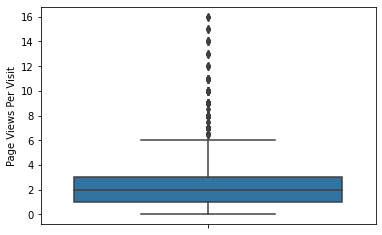

In [889]:
#visualizing the "Page Views Per Visit" attribute for outliers analysis

plt.figure(figsize=(6,4))
sns.boxplot(y=pd_leads_new['Page Views Per Visit'])
plt.show()

In [890]:
#Let's check the percentiles for "Total Time Spent on Website"

pd_leads_new['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

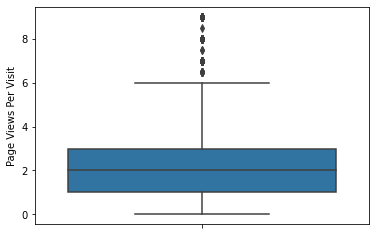

In [891]:
## We can see the outliers available here

#So lets Remove top & bottom 1% 

Q3 = pd_leads_new['Page Views Per Visit'].quantile(0.99)
pd_leads_new = pd_leads_new[pd_leads_new['Page Views Per Visit'] <= Q3]
Q1 = pd_leads_new['Page Views Per Visit'].quantile(0.01)
pd_leads_new = pd_leads_new[pd_leads_new['Page Views Per Visit'] >= Q1]
sns.boxplot(y=pd_leads_new['Page Views Per Visit'])
plt.show()

In [892]:
pd_leads_new.shape

(8924, 11)

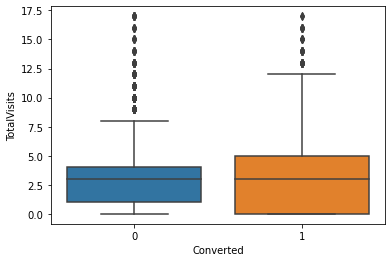

In [893]:
#checking plota "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = pd_leads_new)
plt.show()

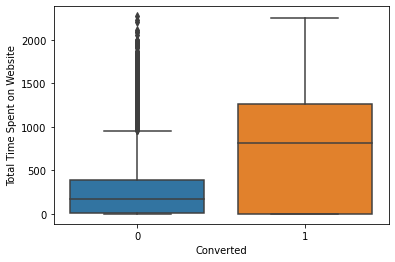

In [894]:
#checking plots "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=pd_leads_new.Converted, y=pd_leads_new['Total Time Spent on Website'])
plt.show()

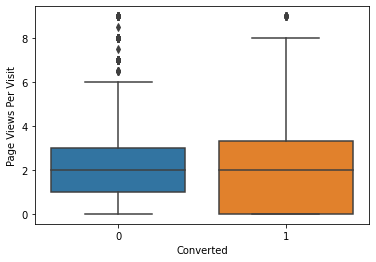

In [895]:
#checking plots for "Page Views Per Visit" vs Converted variable

sns.boxplot(x=pd_leads_new.Converted,y=pd_leads_new['Page Views Per Visit'])
plt.show()

In [896]:
#Last check for the missing values in all the attributes remaining

round(100*(pd_leads_new.isnull().sum()/len(pd_leads_new.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

## Great!! 
- We tried best to clean our data and perform best EDA we can.

- Now lets jump on the model creation......

# Step 3 - Dummy variable creation

In [897]:
pd_leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Do Not Email                            8924 non-null   object 
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Specialization                          8924 non-null   object 
 8   What is your current occupation         8924 non-null   object 
 9   City                                    8924 non-null   object 
 10  A free copy of Mastering The Interview  8924 non-null   obje

In [898]:
pd_leads_new['A free copy of Mastering The Interview'].value_counts()

No     6126
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [899]:
#Create a list of all categorical columns

cat_cols= ['Lead Origin','Lead Source','Do Not Email','Specialization','What is your current occupation','City','A free copy of Mastering The Interview']
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Specialization',
 'What is your current occupation',
 'City',
 'A free copy of Mastering The Interview']

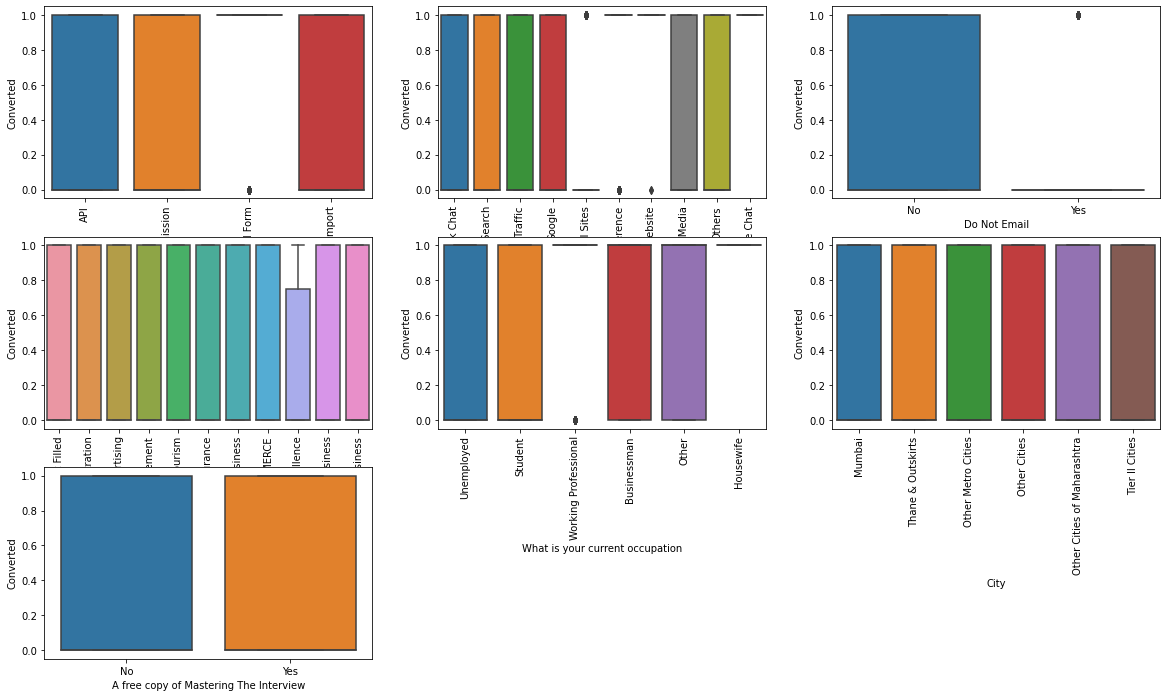

In [900]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Lead Origin', y = 'Converted', data = pd_leads_new).tick_params(axis='x', rotation = 90)
plt.subplot(3,3,2)
sns.boxplot(x = 'Lead Source', y = 'Converted', data = pd_leads_new).tick_params(axis='x', rotation = 90)
plt.subplot(3,3,3)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = pd_leads_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'Specialization', y = 'Converted', data = pd_leads_new).tick_params(axis='x', rotation = 90)
plt.subplot(3,3,5)
sns.boxplot(x = 'What is your current occupation', y = 'Converted', data = pd_leads_new).tick_params(axis='x', rotation = 90)
plt.subplot(3,3,6)
sns.boxplot(x = 'City', y = 'Converted', data = pd_leads_new).tick_params(axis='x', rotation = 90)
plt.subplot(3,3,7)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = pd_leads_new)
plt.show()

### 2 Variables have binary values Yes and No. So let's them convert to 0s and 1s.

In [901]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
pd_leads_new[varlist] = pd_leads_new[varlist].apply(binary_map)

In [902]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Not Filled,Unemployed,Mumbai,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Filled,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Filled,Unemployed,Mumbai,0


## Dummy Variables

Other variables have multiple levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables creation.

In [903]:
# Let's check all the categorical values
cat_cols_val = ['Lead Origin','Lead Source','Specialization','What is your current occupation','City']
for cols in cat_cols_val:
    print('------------- '+cols+' ---------------------')
    print(pd_leads_new[cols].value_counts())
    print('----------------------------------------------------')

------------- Lead Origin ---------------------
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------
------------- Lead Source ---------------------
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                18
Live Chat              2
Name: Lead Source, dtype: int64
----------------------------------------------------
------------- Specialization ---------------------
Management                           4119
Not Filled                           3262
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE 

In [904]:
# Here 3 columns has non created values, so let's create dummies for all of them and use drop_first = True
# And also merge the new dummy data frame to the final data frame

dummy_normal = pd.get_dummies(pd_leads_new[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

In [905]:
dummy_normal.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0


In [906]:
pd_leads_new = pd.concat([pd_leads_new,dummy_normal],axis=1)

In [907]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Not Filled,Unemployed,Mumbai,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Filled,Unemployed,Mumbai,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Filled,Unemployed,Mumbai,...,0,0,0,1,0,0,0,0,0,0


In [908]:
# Other 2 columns Lead Source and Specialization have user created values like "Others" and "Not Filled" 
# So, let's first create dummy variables and then drop these 2 values dummy columns
# After that merge these variables to final data frame

dummy_Specialization = pd.get_dummies(pd_leads_new['Specialization'])

In [909]:
dummy_Specialization.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Not Filled,Rural and Agribusiness,Services Excellence,Travel and Tourism
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [910]:
dummy_Specialization = dummy_Specialization.drop(['Not Filled'], 1)

In [911]:
dummy_Specialization.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [912]:
pd_leads_new = pd.concat([pd_leads_new,dummy_Specialization],axis=1)

In [913]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Not Filled,Unemployed,Mumbai,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Filled,Unemployed,Mumbai,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Filled,Unemployed,Mumbai,...,0,0,0,0,0,0,0,0,0,0


In [914]:
dummy_lead_src = pd.get_dummies(pd_leads_new['Lead Source'])

In [915]:
dummy_lead_src.head()

,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Others,Reference,Referral Sites,Social Media,Welingak Website
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [916]:
dummy_lead_src = dummy_lead_src.drop(['Others'], 1)

In [917]:
dummy_lead_src.head()

,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [918]:
pd_leads_new = pd.concat([pd_leads_new,dummy_lead_src],axis=1)

In [919]:
pd_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
0,API,Olark Chat,0,0,0.0,0,0.0,Not Filled,Unemployed,Mumbai,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Filled,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Filled,Unemployed,Mumbai,...,0,0,1,0,0,0,0,0,0,0


In [920]:
#Now we had already created dummy variables for all the categorical columns
# Let's drop all the categorical coulumns so that there is no catagorical column in the data set

cat_cols1= ['Lead Origin','Lead Source','Specialization','What is your current occupation','City']
cat_cols1

['Lead Origin',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'City']

In [921]:
pd_leads_new.drop(cat_cols1,axis=1,inplace = True)

In [922]:
pd_leads_new.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [923]:
# Looks like all columns are now created in the numeric variables
# Let's check infor of all the columns

pd_leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8924 non-null   int64  
 1   Converted                                             8924 non-null   int64  
 2   TotalVisits                                           8924 non-null   float64
 3   Total Time Spent on Website                           8924 non-null   int64  
 4   Page Views Per Visit                                  8924 non-null   float64
 5   A free copy of Mastering The Interview                8924 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 8   Lead Origin_Lead Import                               8924

## Yupp!! Now all the columns are numeric

# Let's perform Train - Test Split for building Logistic Regression ML model

In [924]:
X=pd_leads_new.drop('Converted', axis=1)

In [925]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [926]:
# Create y as the output variable
y = pd_leads_new['Converted']

In [927]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [928]:
from sklearn.model_selection import train_test_split

In [929]:
# Let's split the data into train and test data with random state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [930]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 6676 to 5847
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6246 non-null   int64  
 1   TotalVisits                                           6246 non-null   float64
 2   Total Time Spent on Website                           6246 non-null   int64  
 3   Page Views Per Visit                                  6246 non-null   float64
 4   A free copy of Mastering The Interview                6246 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6246 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6246 non-null   uint8  
 7   Lead Origin_Lead Import                               6246 non-null   uint8  
 8   What is your current occupation_Housewife             6

In [931]:
# All the variables in the train data have binary values except need to check for first 5 variables

X_train[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']].head(10)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
6676,0,3.0,1247,3.00,0
6138,0,4.0,816,4.00,0
8650,0,3.0,1128,3.00,1
3423,0,0.0,0,0.00,0
6552,0,0.0,0,0.00,0
1696,1,3.0,803,3.00,1
2110,0,9.0,127,3.00,0
6830,1,2.0,385,2.00,1
2581,0,2.0,860,2.00,0
5927,0,13.0,62,2.17,1


In [932]:
# From above set again 2 variables "Do Not Email" and "A free copy of Mastering The Interview" have binary values we had created

# So need to scale only 3 variables

# Let's create scaling for them

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [933]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [934]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [935]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [936]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
count,6246.000000,6.246000e+03,6.246000e+03,6.246000e+03,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.075408,-4.637838e-16,1.871702e-16,-3.457227e-16,0.309318,0.528498,0.063401,0.003522,0.000961,0.001601,...,0.019693,0.275376,0.322126,0.000160,0.199328,0.121358,0.048671,0.013929,0.003682,0.013449
std,0.264070,1.000080e+00,1.000080e+00,1.000080e+00,0.462249,0.499227,0.243702,0.059249,0.030981,0.039984,...,0.138953,0.446739,0.467328,0.012653,0.399527,0.326569,0.215197,0.117205,0.060575,0.115195
min,0.000000,-1.092332e+00,-8.783901e-01,-1.199117e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.447668e-01,-8.656247e-01,-6.676484e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-4.963628e-02,-4.361615e-01,-1.361797e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,6.454942e-01,7.988872e-01,3.952890e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.816277e+00,3.264881e+00,3.584101e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


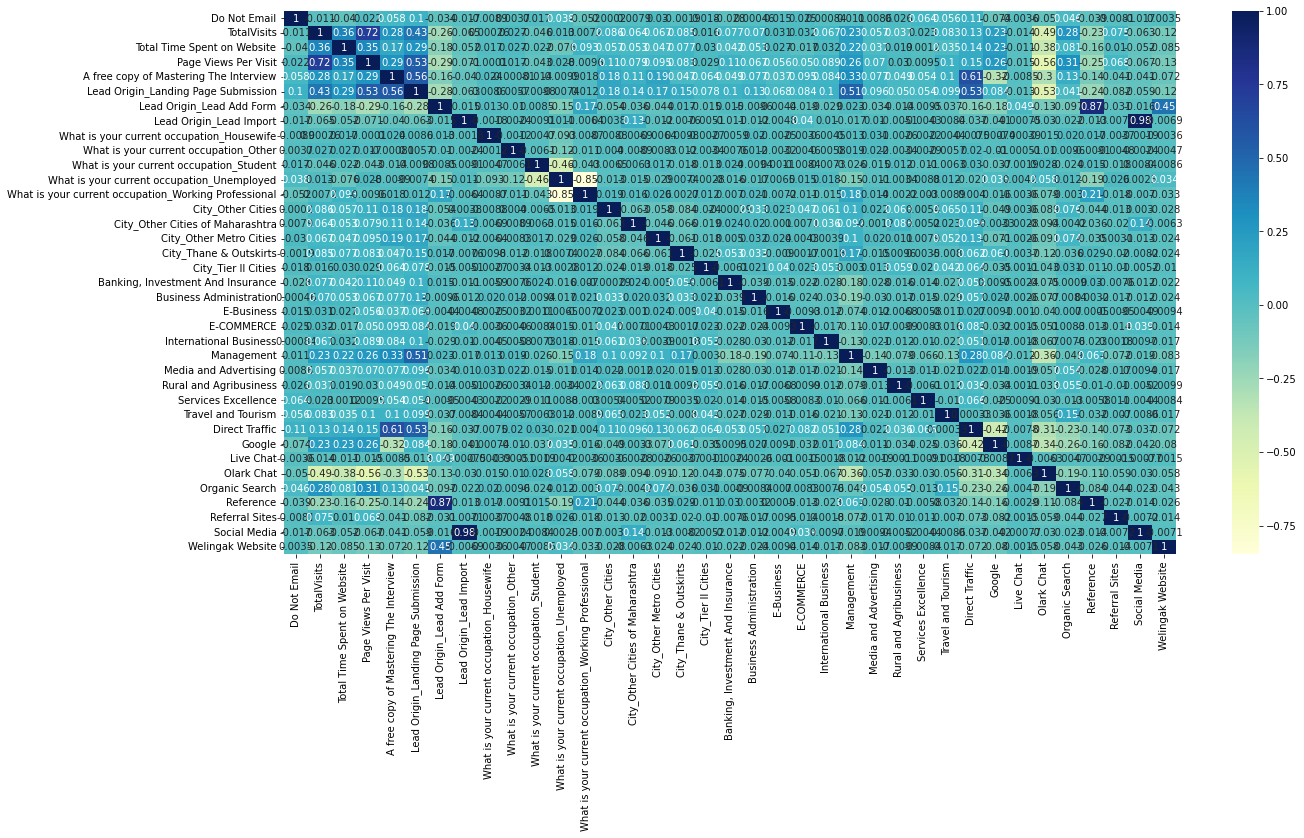

In [937]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## As we can see from the above heat map it is difficult to identify the high correlation between variables

## So, let's use RFE to remove highly correlated variables

# Let's Build the model using Stats Model & RFE

In [938]:
import statsmodels.api as sm

In [939]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=18)             # running RFE with 18 variables as explained in session
rfe = rfe.fit(X_train, y_train)

In [940]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True])

In [941]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 3),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 3),
 ('City_Thane & Outskirts', False, 3),
 ('City_Tier II Cities', False, 3),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', True, 1),
 ('E-Business', True, 1),
 ('E-COMMERCE', True, 1),
 ('International Business', True, 1),
 ('Manag

In [942]:
#list of RFE supported columns
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Banking, Investment And Insurance', 'Business Administration',
       'E-Business', 'E-COMMERCE', 'International Business', 'Management',
       'Media and Advertising', 'Services Excellence', 'Reference',
       'Referral Sites', 'Welingak Website'],
      dtype='object')

In [943]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Rural and Agribusiness', 'Travel and Tourism', 'Direct Traffic',
       'Google', 'Live Chat', 'Olark Chat', 'Organic Search', 'Social Media'],
      dtype='object')

In [944]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[rfe_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.3
Date:                Tue, 18 Oct 2022   Deviance:                       5988.5
Time:                        01:56:47   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3090
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7839      0.639     -1.226      0.220      -2.037       0.469
Do Not Email                                            -1.5031      0.163     -9.229      0.000      -1.822      -1.184
Total Time Spent on Website                              0.9755      0.034     28.821      0.000       0.909       1.042
Lead Origin_Lead Add Form                                2.2660      0.866      2.616      0.009       0.568       3.964
What is your current occupation_Housewife               22.4936   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
What is your current occupation_Student                 -0.1688      0.672     -0.251      0.802      -1.486       1.148
What is your current occupation_Unemployed              -0.1467      0.638     -0.230      0.818      -1.397       1.104
What is your current occupation_Working Professional     2.5534      0.660      3.867      0.000       1.259       3.848
Banking, Investment And Insurance                        0.3954      0.172      2.301      0.021       0.059       0.732
Business Administration                                  0.0817      0.165      0.495      0.621      -0.242       0.405
E-Business                                              -0.1636      0.395     -0.415      0.678      -0.937       0.610
E-COMMERCE                                               0.0438      0.279      0.157      0.875      -0.503       0.591
International Business                                  -0.0447      0.221     -0.202      0.840      -0.477       0.388
Management                                               0.1235      0.073      1.690      0.091      -0.020       0.267
Media and Advertising                                    0.2117      0.216      0.978      0.328      -0.213       0.636
Services Excellence                                     -0.0399      0.474     -0.084      0.933      -0.969       0.889
Reference                                                1.5264      0.893      1.710      0.087      -0.223       3.276
Referral Sites                                          -0.6368      0.299     -2.127      0.033      -1.224      -0.050
Welingak Website                                         3.4135      1.128      3.026      0.002       1.202       5.625
========================================================================================================================
"""

In [945]:
# p-value of some variables are very high, so let's drop all of them.

rfe_cols = rfe_cols.drop('What is your current occupation_Housewife')

In [946]:
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Banking, Investment And Insurance', 'Business Administration',
       'E-Business', 'E-COMMERCE', 'International Business', 'Management',
       'Media and Advertising', 'Services Excellence', 'Reference',
       'Referral Sites', 'Welingak Website'],
      dtype='object')

In [947]:
rfe_cols = rfe_cols.drop('What is your current occupation_Student')
rfe_cols = rfe_cols.drop('What is your current occupation_Unemployed')
rfe_cols = rfe_cols.drop('Business Administration')
rfe_cols = rfe_cols.drop('E-Business')
rfe_cols = rfe_cols.drop('E-COMMERCE')
rfe_cols = rfe_cols.drop('International Business')
rfe_cols = rfe_cols.drop('Services Excellence')

In [948]:
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Banking, Investment And Insurance', 'Management',
       'Media and Advertising', 'Reference', 'Referral Sites',
       'Welingak Website'],
      dtype='object')

In [949]:
# Assessing the model2 with StatsModels

X_train_sm = sm.add_constant(X_train[rfe_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.8
Date:                Tue, 18 Oct 2022   Deviance:                       5997.6
Time:                        01:56:55   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9255      0.049    -18.975      0.000      -1.021      -0.830
Do Not Email                                            -1.5069      0.163     -9.272      0.000      -1.825      -1.188
Total Time Spent on Website                              0.9765      0.034     29.138      0.000       0.911       1.042
Lead Origin_Lead Add Form                                2.2627      0.866      2.612      0.009       0.565       3.960
What is your current occupation_Working Professional     2.6989      0.177     15.207      0.000       2.351       3.047
Banking, Investment And Insurance                        0.3890      0.170      2.289      0.022       0.056       0.722
Management                                               0.1219      0.068      1.789      0.074      -0.012       0.255
Media and Advertising                                    0.2200      0.214      1.030      0.303      -0.199       0.639
Reference                                                1.5326      0.893      1.717      0.086      -0.217       3.282
Referral Sites                                          -0.6408      0.299     -2.145      0.032      -1.226      -0.055
Welingak Website                                         3.4134      1.128      3.026      0.002       1.202       5.624
========================================================================================================================
"""

In [950]:
# Since 'All' the p-values are less Let's check VIF to see if there is any correlation between the variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [951]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,49.60
7,Reference,39.12
9,Welingak Website,11.52
5,Management,1.22
3,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.10
0,Do Not Email,1.05
4,"Banking, Investment And Insurance",1.01
6,Media and Advertising,1.01
8,Referral Sites,1.00


In [952]:
# There is a high correlation between two variables so we drop the variable with the higher valued VIF value

#dropping variable with high VIF but here we will drop Reference because Lead Origin_Lead Add Form is best factor to identify the lead

rfe_cols = rfe_cols.drop('Reference')

In [953]:
# Assessing the model3 with StatsModels

X_train_sm = sm.add_constant(X_train[rfe_cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.0
Date:                Tue, 18 Oct 2022   Deviance:                       6000.0
Time:                        01:57:25   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9247      0.049    -18.967      0.000      -1.020      -0.829
Do Not Email                                            -1.5036      0.162     -9.264      0.000      -1.822      -1.185
Total Time Spent on Website                              0.9764      0.034     29.128      0.000       0.911       1.042
Lead Origin_Lead Add Form                                3.7300      0.217     17.158      0.000       3.304       4.156
What is your current occupation_Working Professional     2.7010      0.177     15.224      0.000       2.353       3.049
Banking, Investment And Insurance                        0.3897      0.170      2.295      0.022       0.057       0.723
Management                                               0.1200      0.068      1.762      0.078      -0.013       0.253
Media and Advertising                                    0.2193      0.214      1.026      0.305      -0.199       0.638
Referral Sites                                          -0.6413      0.299     -2.146      0.032      -1.227      -0.056
Welingak Website                                         1.9444      0.753      2.582      0.010       0.469       3.420
========================================================================================================================
"""

In [954]:
# Let's run the VIF2.

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.45
8,Welingak Website,1.29
5,Management,1.22
3,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.09
0,Do Not Email,1.05
4,"Banking, Investment And Insurance",1.01
6,Media and Advertising,1.01
7,Referral Sites,1.00


## Wohaa!! now all VIF values are in proper range..
## Let's check the on the P-values, Lead Score, other matrix on Train Data also

In [955]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [956]:
y_train_pred[:10]

array([0.63597935, 0.44782942, 0.96499896, 0.14401494, 0.14401494,
       0.14980283, 0.77984021, 0.07724356, 0.43755359, 0.18958952])

In [957]:
## Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,CustID
0,1,0.635979,6676
1,1,0.447829,6138
2,1,0.964999,8650
3,0,0.144015,3423
4,0,0.144015,6552


In [958]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CustID,Predicted
0,1,0.635979,6676,1
1,1,0.447829,6138,0
2,1,0.964999,8650,1
3,0,0.144015,3423,0
4,0,0.144015,6552,0


In [959]:
## Let's check the different matrices

from sklearn import metrics

In [960]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3360  511]
 [ 750 1625]]


In [961]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.79811079090618


In [962]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [963]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.45
8,Welingak Website,1.29
5,Management,1.22
3,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.09
0,Do Not Email,1.05
4,"Banking, Investment And Insurance",1.01
6,Media and Advertising,1.01
7,Referral Sites,1.00


# Metrics beyond simply accuracy

In [964]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [965]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6842105263157895

In [966]:
# Let us calculate specificity
TN / float(TN+FP)

0.8679927667269439

In [967]:
# Calculate false postive rate - predicting converted when lead does not converted
print(FP/ float(TN+FP))

0.13200723327305605


In [968]:
# positive predictive value 
print (TP / float(TP+FP))

0.7607677902621723


In [969]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8175182481751825


# Plotting the ROC Curve

In [970]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [971]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

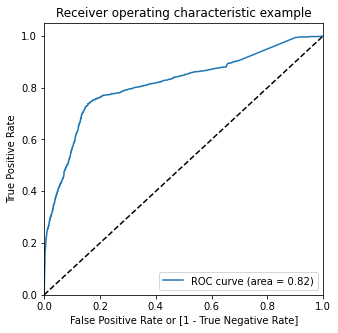

In [972]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The ROC Curve value should be close to 1. We are getting it = 0.82. Seems like good predictive model.
## Time crunch will try it again to get better than this in next week.

In [973]:
## Finding Optimal Cutoff Point

## Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.635979,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.447829,6138,0,1,1,1,1,1,0,0,0,0,0
2,1,0.964999,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.144015,3423,0,1,1,0,0,0,0,0,0,0,0
4,0,0.144015,6552,0,1,1,0,0,0,0,0,0,0,0


In [974]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.433237  0.994947  0.088608
0.2   0.2  0.653858  0.834947  0.542754
0.3   0.3  0.787544  0.760421  0.804185
0.4   0.4  0.802434  0.713684  0.856885
0.5   0.5  0.788985  0.644211  0.877809
0.6   0.6  0.764009  0.526737  0.909584
0.7   0.7  0.744476  0.414737  0.946784
0.8   0.8  0.718540  0.294316  0.978817
0.9   0.9  0.683958  0.175579  0.995867


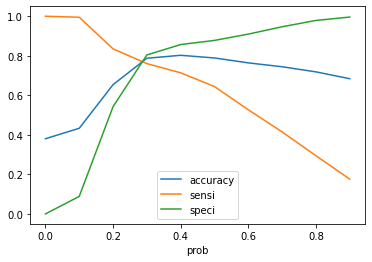

In [975]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [976]:
## From the curve above, 0.27 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.635979,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.447829,6138,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.964999,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.144015,3423,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.144015,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [979]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','CustID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,CustID,final_predicted,Lead_Score
0,1,0.635979,6676,1,64
1,1,0.447829,6138,1,45
2,1,0.964999,8650,1,96
3,0,0.144015,3423,0,14
4,0,0.144015,6552,0,14


In [981]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7667307076528979

In [982]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2947,  924],
       [ 533, 1842]], dtype=int64)

In [983]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [984]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.775578947368421

In [985]:
# Let us calculate specificity
TN / float(TN+FP)

0.7613019891500904

In [986]:
# Calculate false postive rate - predicting lead did not convert
print(FP/ float(TN+FP))

0.23869801084990958


In [987]:
# Positive predictive value 
print (TP / float(TP+FP))

0.665943600867679


In [988]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8468390804597701


In [990]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2947,  924],
       [ 533, 1842]], dtype=int64)

In [991]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.665943600867679

In [992]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.775578947368421

In [993]:
from sklearn.metrics import precision_score, recall_score

In [994]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.665943600867679

In [996]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.775578947368421

In [997]:
from sklearn.metrics import precision_recall_curve

In [999]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

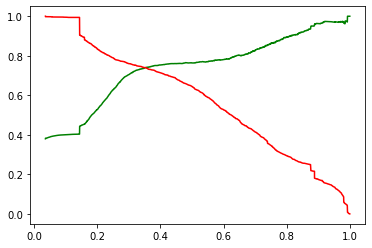

In [1000]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1001]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 7625 to 8705
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2678 non-null   int64  
 1   TotalVisits                                           2678 non-null   float64
 2   Total Time Spent on Website                           2678 non-null   int64  
 3   Page Views Per Visit                                  2678 non-null   float64
 4   A free copy of Mastering The Interview                2678 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2678 non-null   uint8  
 6   Lead Origin_Lead Add Form                             2678 non-null   uint8  
 7   Lead Origin_Lead Import                               2678 non-null   uint8  
 8   What is your current occupation_Housewife             2

In [1002]:
#scaling test set - We will use only Transform in place of Fit_Transform because on Test set only transform needs to be done

num_cols_test = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[num_cols_test] = scaler.transform(X_test[num_cols_test])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Travel and Tourism,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website
7625,0,-0.397202,2.077703,-0.136180,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5207,0,0.297929,0.739164,0.926758,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2390,0,-1.092332,-0.878390,-1.199117,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4362,0,-0.397202,-0.455310,-0.136180,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1023,0,4.121147,-0.300302,1.458226,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [1005]:
X_test = X_test[rfe_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Banking, Investment And Insurance",Management,Media and Advertising,Referral Sites,Welingak Website
7625,0,2.077703,0,0,0,1,0,0,0
5207,0,0.739164,0,0,0,1,0,0,0
2390,0,-0.878390,1,0,0,0,0,0,0
4362,0,-0.455310,0,0,0,1,0,0,0
1023,0,-0.300302,0,0,0,1,0,0,0


In [1006]:
X_test_sm = sm.add_constant(X_test)

In [1008]:
## Let's make predictions on Test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7625    0.772743
5207    0.479255
2390    0.875191
4362    0.222828
1023    0.250130
8226    0.652706
3079    0.261312
530     0.263725
7873    0.144015
5146    0.568721
dtype: float64

In [1009]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [1010]:
# Let's check the y_pred data
y_pred_1.head()

,0
7625,0.772743
5207,0.479255
2390,0.875191
4362,0.222828
1023,0.250130


In [1011]:
y_test_df = pd.DataFrame(y_test)

In [1012]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [1013]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1014]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1015]:
y_pred_final.head()

,Converted,CustID,0
0,0,7625,0.772743
1,1,5207,0.479255
2,1,2390,0.875191
3,0,4362,0.222828
4,0,1023,0.250130


In [1016]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1019]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Converted','Converted_prob']]

In [1020]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1021]:
# Let's check the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_prob,Lead_Score
0,7625,0,0.772743,77
1,5207,1,0.479255,48
2,2390,1,0.875191,88
3,4362,0,0.222828,22
4,1023,0,0.250130,25


In [1022]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [1023]:
y_pred_final.head()

,CustID,Converted,Converted_prob,Lead_Score,final_predicted
0,7625,0,0.772743,77,1
1,5207,1,0.479255,48,1
2,2390,1,0.875191,88,1
3,4362,0,0.222828,22,0
4,1023,0,0.250130,25,0


In [1025]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.80134428678118

In [1027]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1437,  247],
       [ 285,  709]], dtype=int64)

In [1028]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1029]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7132796780684104

In [1030]:
# Let us calculate specificity
TN / float(TN+FP)

0.8533254156769596